<h1 align='center'> 영상처리프로그래밍 중간고사</h1>

<h3 align='center'> 담당교수 : 박섭형</h3>

<p style="text-align: right"> 2022.4.19.</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 아래에 자신의 이름, 학번, 학과(전공)을 적으세요.

  - 이름:
  - 학번:
  - 학과(전공):
    
</div>

- 주의 사항
  - 시험 시간: 오후 3:00 ~ 오후 2:10
  - 시험 시간 동안에는 카메라를 켜서 자신의 모습이 화면에 나타나야 함
  - 오후 4:10에 줌을 종료하고 SmartLead에 .ipynb 파일을 업로드
    - 업로드 마감 시간: 오후 4:15
  - 파일 업로드 후에 자신의 답안지를 설명하는 개인 동영상 녹화 시작
     - 녹화할 때 Jupyter notebook 화면이 전체 화면에 나오고 설명하는 자신의 얼굴이 화면 모퉁이에 함께 녹화되어야 함
     - 문제 하나당 설명 시간이 3분을 넘지 않도록 주의
  - 동영상 파일을 SmartLead에 파일 업로드
    - 업로드 마감 시간: 오후 4:50
  - 주: 아래 두 파일을 별도로 업로드 함.
     - ipynb 파일 (마감 시간 오후 4:15)
     - 문제해설 녹화 동영상 (마감 시간 오후 4:50)


#### 채점 결과 


| 문제 | 문제 1 | 문제 2 | 문제 3 | 문제 4 | 문제 5 | 문제 6 | 합계 |
--|--|--|--|--|--|--|--
만점 | 10 | 10 | 30 | 20 | 20 | 10 | 100
득점 | 10 | 10 | 30 | 20 | 20 | 10 | 100

## 'istanbul.jpg' 파일을 읽고, 다음 질문에 답을 하라.

### 문제 1.
이 영상 데이터를 표현하는 numpy ndarray에서 순서 영상 데이터가 차지하는 메모리의 크기가 몇 byte 인지 계산하는 프로그램을 작성하라.

**1 번 답**:

In [1]:
import cv2
import numpy as np

In [2]:
file_name = 'istanbul.jpg'
istanbul = cv2.imread(file_name)


In [17]:
istanbul.size, istanbul.nbytes

(72000000, 72000000)

## 문제 2.
이 영상의 크기를 가로 1,200 화소, 세로 800 화소로 줄여서 같은 변수에 할당하라.

In [3]:
istanbul = cv2.resize(istanbul, (1200, 800), interpolation=cv2.INTER_AREA)

In [4]:
istanbul.min(), istanbul.max()

(17, 253)

In [5]:
import matplotlib.pyplot as plt

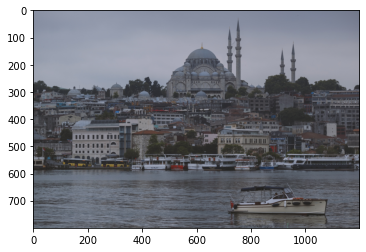

In [7]:
plt.imshow(istanbul[:,:,::-1])

### 문제 3.

'image' 라는 이름의 title을 가진 창을 만들고 이 창에 문제 1-2에서 만든 작은 영상을 표시하고,
마우스를 그 창 위에서 움직이면 반지름이 영상의 높이의 1/4인 흰색 원이 마우스를 따라 움직이는 프로그램을 작성하라. 단, 원의 중심은 마우스의 현재 위치가 되고, 키보드로 'q'를 입력하면 프로그램이 종료되어야 한다.

In [9]:
import numpy as np


def onMouse(event, x, y, flags, param):
    global radius, img2, center
    if event == cv2.EVENT_MOUSEMOVE:
        center = [x, y]
        img2 = img.copy()
        cv2.circle(img2, center, radius, white, cv2.LINE_4)
        cv2.imshow("Image", img2)


white = (255, 255, 255)
file_name = 'istanbul.jpg'
img = cv2.imread(file_name)
img = cv2.resize(istanbul, (1200, 800), interpolation=cv2.INTER_AREA)
img2 = img.copy()
radius = img.shape[1]//4
center = (img.shape[1]//2, img.shape[0]//2)
dr = 10
RADIUS_MIN = 10
RADIUS_MAX = img.shape[1]//2
winName = "Image"

cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
cv2.imshow(winName, img2)
#cv2.imshow("Cropped Image", img2)

cv2.setMouseCallback("Image", onMouse)

while cv2.waitKey(0) != ord('q'):
    pass

cv2.destroyAllWindows()

### 문제 4.

문제 3에서 만든 프로그램에 다음 기능을 추가하라.

마우스를 따라서 움직이는 원의 내부에만 감마 변환을 적용한 영상을 표시하라.
단, 감마의 값은 0.5로 한다.

In [13]:
import numpy as np


def onMouse(event, x, y, flags, param):
    global radius, img2, center
    if event == cv2.EVENT_MOUSEMOVE:
        center = [x, y]
        img2 = img.copy()
        cv2.circle(img2, center, radius, white, cv2.LINE_4)
        X = np.arange(img.shape[1]).reshape(1, img.shape[1])
        Y = np.arange(img.shape[0]).reshape(img.shape[0], 1)
        inside_idx = (X-center[0])**2 + (Y-center[1])**2 < radius**2
        LUT = gamma_transformation_LUT(gamma)
        img2[inside_idx] = cv2.LUT(img2[inside_idx], LUT)
        cv2.imshow("Image", img2)

def gamma_transformation_LUT(gamma):
    out = 255. ** (1. - gamma) * np.arange(256) ** gamma
    return out.round(0).clip(0,255).astype(np.uint8)


white = (255, 255, 255)
img = cv2.imread(file_name)
img = cv2.resize(istanbul, (1200, 800), interpolation=cv2.INTER_AREA)
img2 = img.copy()
radius = img.shape[1]//4
center = (img.shape[1]//2, img.shape[0]//2)
dr = 10
RADIUS_MIN = 10
RADIUS_MAX = img.shape[1]//2

gamma = .5
gamma_lut = gamma_transformation_LUT(gamma)

winName = "Image"

cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
cv2.imshow(winName, img2)

cv2.setMouseCallback("Image", onMouse)

while cv2.waitKey(0) != ord('q'):
    pass

cv2.destroyAllWindows()

### 문제 5.

문제 4에서 만든 프로그램에 다음 기능을 추가하라.

왼쪽 마우스를 클릭할 때마다 감마의 값은 0.1씩 감소하고, 오른쪽 마우스를 클릭할 때마다 감마의 값은 0.1씩 증가한다. 단, 감마의 범위는 0.1부터 2.0까지로 제한한다.

In [17]:
import numpy as np


def onMouse(event, x, y, flags, param):
    global radius, img2, center, gamma
    if event == cv2.EVENT_MOUSEMOVE:
        center = [x, y]
        
    elif event == cv2.EVENT_LBUTTONUP:
        # gamma = gamma - 0.1
        # if gamma < 0.1:
        #     gamma = 0.1
        gamma = max(0.1, gamma - dgamma)
    elif event == cv2.EVENT_RBUTTONUP:
        gamma = min(2.0, gamma + dgamma)
    center = [x, y]
    img2 = img.copy()
    cv2.circle(img2, center, radius, white, cv2.LINE_4)
    X = np.arange(img.shape[1]).reshape(1, img.shape[1])
    Y = np.arange(img.shape[0]).reshape(img.shape[0], 1)
    inside_idx = (X-center[0])**2 + (Y-center[1])**2 < radius**2
    LUT = gamma_transformation_LUT(gamma)
    img2[inside_idx] = cv2.LUT(img2[inside_idx], LUT)
    cv2.imshow("Image", img2)
        
def gamma_transformation_LUT(gamma):
    out = 255. ** (1. - gamma) * np.arange(256) ** gamma
    return out.round(0).clip(0,255).astype(np.uint8)


white = (255, 255, 255)
img = cv2.imread(file_name)
img = cv2.resize(istanbul, (1200, 800), interpolation=cv2.INTER_AREA)
img2 = img.copy()
radius = img.shape[1]//4
center = (img.shape[1]//2, img.shape[0]//2)
dgamma = 0.1
RADIUS_MIN = 10
RADIUS_MAX = img.shape[1]//2

gamma = .5
gamma_lut = gamma_transformation_LUT(gamma)
winName = "Image"
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
cv2.imshow(winName,img2)
#cv2.imshow("Cropped Image", img2)

cv2.setMouseCallback("Image", onMouse)

while cv2.waitKey(0) != ord('q'):
    pass

cv2.destroyAllWindows()

### 문제 6. (Extra Bonus)

문제 5에서 만든 프로그램에 다음 기능을 추가하라.

키보드로 'd'를 누르면 원의 반지름이 10씩 감소하고, 'f'를 누르면 원의 반지름이 10씩 증가한다. 단, 반지름의 마의 범위는 50부터 영상의 높이의 1/2까지로 제한한다.

In [8]:
import numpy as np


def onMouse(event, x, y, flags, param):
    global radius, img2, center, gamma
    if event == cv2.EVENT_MOUSEMOVE:
        center = [x, y]
        img2 = img.copy()
    elif event == cv2.EVENT_LBUTTONUP:
        gamma = max(0.1, gamma - dgamma)
    elif event == cv2.EVENT_RBUTTONUP:
        gamma = min(2.0, gamma + dgamma)
    center = [x, y]
    img2 = img.copy()
    cv2.circle(img2, center, radius, white, cv2.LINE_4)
    X = np.arange(img.shape[1]).reshape(1, img.shape[1])
    Y = np.arange(img.shape[0]).reshape(img.shape[0], 1)
    inside_idx = (X-center[0])**2 + (Y-center[1])**2 < radius**2
    LUT = gamma_transformation_LUT(gamma)
    img2[inside_idx] = cv2.LUT(img2[inside_idx], LUT)
    cv2.imshow("Image", img2)
        
def gamma_transformation_LUT(gamma):
    out = 255. ** (1. - gamma) * np.arange(256) ** gamma
    return out.round(0).clip(0,255).astype(np.uint8)


white = (255, 255, 255)
img = cv2.imread("istanbul-s.png")
img2 = img.copy()
radius = img.shape[1]//4
center = (img.shape[1]//2, img.shape[0]//2)
dgamma = 0.1
RADIUS_MIN = 10
RADIUS_MAX = img.shape[1]//2
dradius = 10
gamma = .5
gamma_lut = gamma_transformation_LUT(gamma)

winName = "Image"
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, img2)

cv2.setMouseCallback("Image", onMouse)

while True:
    key_in = cv2.waitKey(0)
    if key_in == ord('q'):
        break
    elif key_in == ord('d'):
        radius = max(RADIUS_MIN, radius - dradius)
    elif key_in == ord('f'):
        radius = min(RADIUS_MAX, radius + dradius)

cv2.destroyAllWindows()

In [18]:
import numpy as np

def update_circle_area():
    global img2, radius, center
    img2 = img.copy()
    cv2.circle(img2, center, radius, white, cv2.LINE_4)
    X = np.arange(img.shape[1]).reshape(1, img.shape[1])
    Y = np.arange(img.shape[0]).reshape(img.shape[0], 1)
    inside_idx = (X-center[0])**2 + (Y-center[1])**2 < radius**2
    LUT = gamma_transformation_LUT(gamma)
    img2[inside_idx] = cv2.LUT(img2[inside_idx], LUT)
    cv2.imshow("Image", img2)
    
def onMouse(event, x, y, flags, param):
    global gamma, center
    if event == cv2.EVENT_MOUSEMOVE:
        center = [x, y]
    elif event == cv2.EVENT_LBUTTONUP:
        gamma = max(0.1, gamma - dgamma)
    elif event == cv2.EVENT_RBUTTONUP:
        gamma = min(2.0, gamma + dgamma)
    center = [x, y]
    update_circle_area()
        
def gamma_transformation_LUT(gamma):
    out = 255. ** (1. - gamma) * np.arange(256) ** gamma
    return out.round(0).clip(0,255).astype(np.uint8)


white = (255, 255, 255)
img = cv2.imread(file_name)
img = cv2.resize(istanbul, (1200, 800), interpolation=cv2.INTER_AREA)
img2 = img.copy()
radius = img.shape[1]//4
center = (img.shape[1]//2, img.shape[0]//2)
dgamma = 0.1
RADIUS_MIN = 10
RADIUS_MAX = img.shape[1]//2
dradius = 10
gamma = .5
gamma_lut = gamma_transformation_LUT(gamma)
winName = "Image"

cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
cv2.imshow(winName, img2)
#cv2.imshow("Cropped Image", img2)

cv2.setMouseCallback("Image", onMouse)

while True:
    key_in = cv2.waitKey(0)
    if key_in == ord('q'):
        break
    elif key_in == ord('d'):
        radius = max(RADIUS_MIN, radius - dradius)
        update_circle_area()
    elif key_in == ord('f'):
        radius = min(RADIUS_MAX, radius + dradius)
        update_circle_area()

cv2.destroyAllWindows()